<a href="https://colab.research.google.com/github/NataliiaPyrih/University-Projects/blob/main/Project4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ИАД/IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [ ]:
df.duplicated().sum()

3

In [ ]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

([<matplotlib.patches.Wedge at 0x7d72a13010c0>,
 [Text(0.5295169895422337, 0.964163760875781, 'Iris-setosa'),
  Text(-1.0989953336498821, -0.04700272987587277, 'Iris-versicolor'),
  Text(0.5702318449125436, -0.9406570273206047, 'Iris-virginica')],
 [Text(0.2888274488412183, 0.5259075059322441, '34%'),
  Text(-0.599452000172663, -0.025637852659566963, '33%'),
  Text(0.3110355517704783, -0.5130856512657843, '33%')])

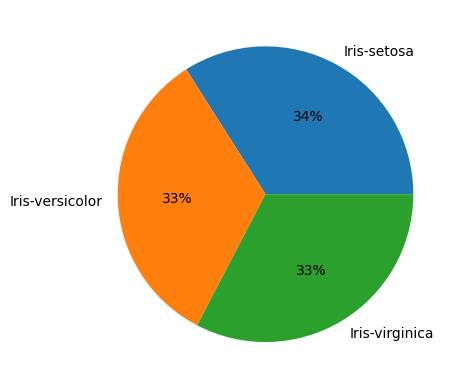

In [ ]:
plt.pie(df['species'].value_counts(), labels=df['species'].unique(), autopct='%.0f%%')

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [ ]:
labels=df['species']
features=df.drop(['species'], axis=1)

In [ ]:
scaler=StandardScaler()
features_scaled=scaler.fit_transform(features)

In [ ]:
models={
    "KMeans":KMeans(n_clusters=3),
    "DBSCAN":DBSCAN(),
    "AgglomerativeClustering":AgglomerativeClustering(n_clusters=3)
}


In [ ]:
models_test_pred = {}
for name, model in models.items():
  y_pred = model.fit_predict(features_scaled)
  models_test_pred[name] = y_pred

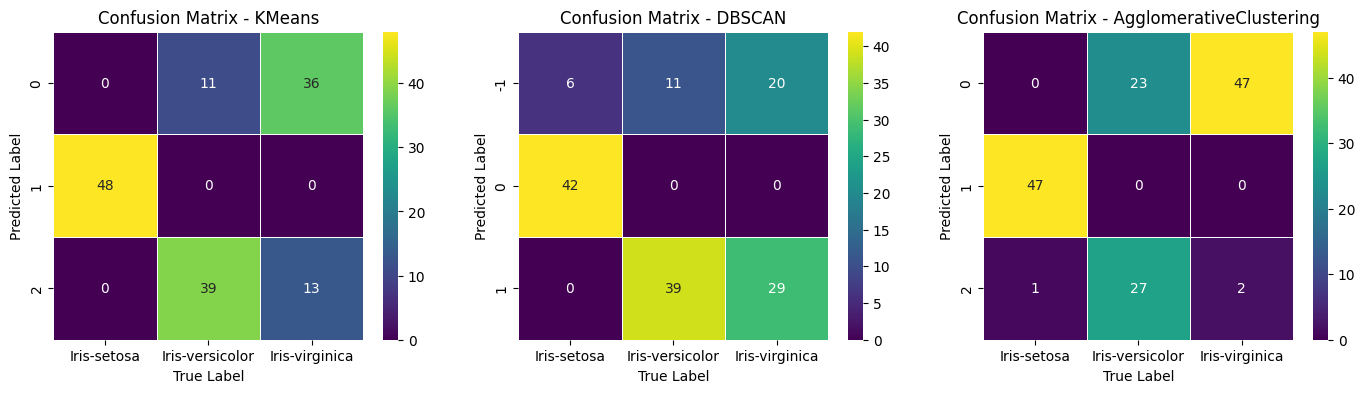

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=len(models), figsize=(17, 4))

for i, (name, model) in enumerate(models.items()):
  df = pd.DataFrame({'labels': models_test_pred[name], 'species': labels})
  ct = pd.crosstab(df['labels'], df['species'])
  sns.heatmap(ct, annot=True, fmt='d', cmap='viridis', linewidths=.5, ax=axes[i])
  axes[i].set_xlabel('True Label')
  axes[i].set_ylabel('Predicted Label')
  axes[i].set_title(f'Confusion Matrix - {name}')

In [ ]:
for name, model in models.items():
  silhouette_avg = silhouette_score(features, models_test_pred[name])
  print(f"Silhouette Score for {name}: {silhouette_avg}")

Silhouette Score for KMeans: 0.5038502819860474
Silhouette Score for DBSCAN: 0.35399125706124346
Silhouette Score for AgglomerativeClustering: 0.49987657183398204


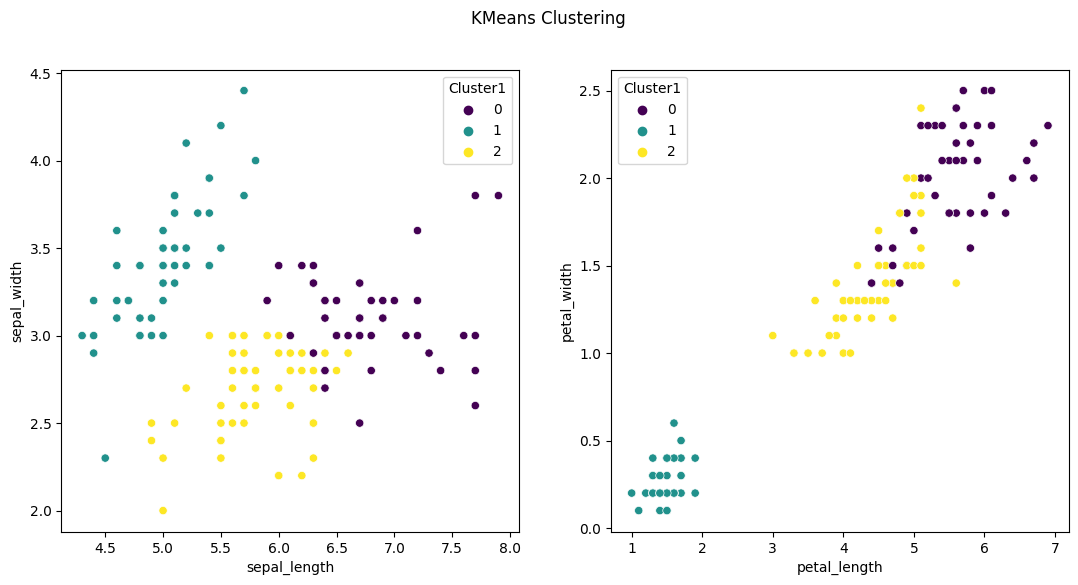

In [ ]:
data_with_clusters = features.copy()
data_with_clusters['Cluster1'] = models_test_pred['KMeans']

x_feature = 'sepal_length'
y_feature = 'sepal_width'
x_feature2='petal_length'
y_feature2='petal_width'

fig, axs =plt.subplots(1,2, figsize=(13, 6))

sns.scatterplot(x=x_feature, y=y_feature, hue='Cluster1', data=data_with_clusters, palette='viridis',legend='full', ax=axs[0])
sns.scatterplot(x=x_feature2, y=y_feature2, hue='Cluster1', data=data_with_clusters, palette='viridis', legend='full', ax=axs[1])
plt.suptitle('KMeans Clustering', ha='center')
plt.show()

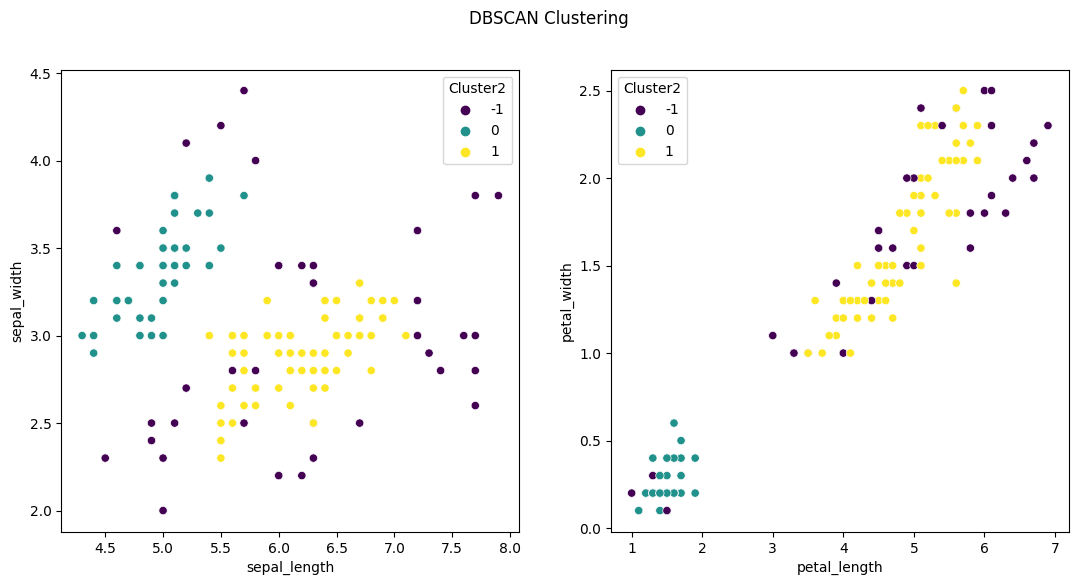

In [ ]:
data_with_clusters['Cluster2'] = models_test_pred['DBSCAN']
fig, axs =plt.subplots(1,2, figsize=(13, 6))
sns.scatterplot(x=x_feature, y=y_feature, hue='Cluster2', data=data_with_clusters, palette='viridis', legend='full', ax=axs[0])
sns.scatterplot(x=x_feature2, y=y_feature2, hue='Cluster2', data=data_with_clusters, palette='viridis', legend='full', ax=axs[1])
plt.suptitle('DBSCAN Clustering', ha='center')
plt.show()

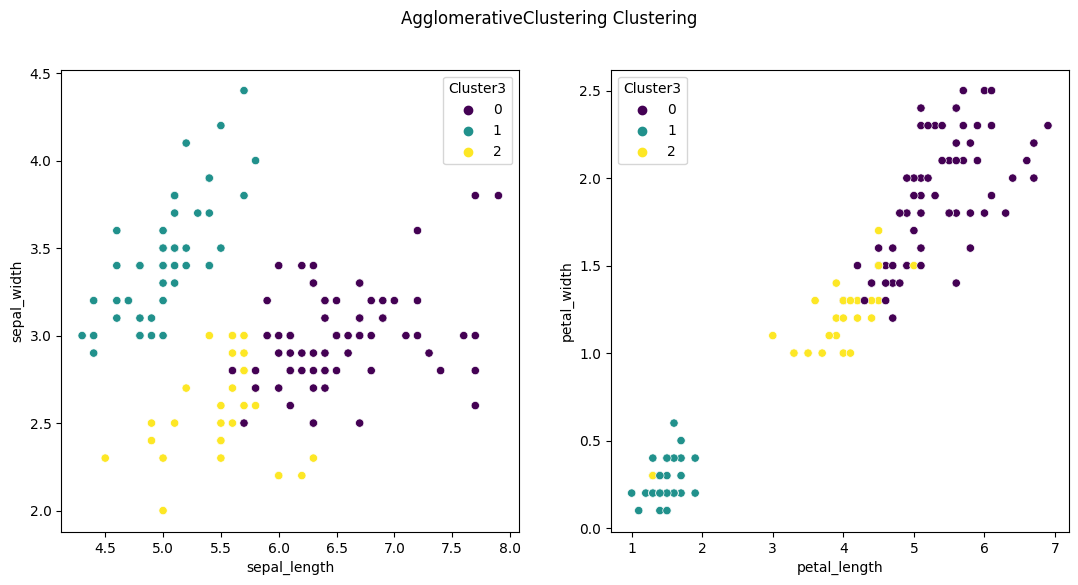

In [ ]:
data_with_clusters['Cluster3'] = models_test_pred['AgglomerativeClustering']
fig, axs =plt.subplots(1,2, figsize=(13, 6))
sns.scatterplot(x=x_feature, y=y_feature, hue='Cluster3', data=data_with_clusters, palette='viridis', legend='full', ax=axs[0])
sns.scatterplot(x=x_feature2, y=y_feature2, hue='Cluster3', data=data_with_clusters, palette='viridis', legend='full', ax=axs[1])
plt.suptitle('AgglomerativeClustering Clustering', ha='center')
plt.show()